# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'9fe56febd0332843c74cd3821d729562'

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "&units=metric"
query_url = url + "appid=" + weather_api_key + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=9fe56febd0332843c74cd3821d729562&q='

In [15]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
           
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | sarmiento
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | nkurenkuru
City not found. Skipping...
Processing Record 7 of Set 1 | toga village
City not found. Skipping...
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | strezhevoy
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | kharp
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | primorsk
Processing Record 14 of Set 1 | pauini
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | taro
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | west livingston
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | invercargill
Pro

In [16]:
#comment out try and except, etc. and test out some of the variables to see if they work and get the actual setup of the dict, list
#city_weather

In [17]:
#see above
#weather_json

In [18]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.60,81,100,16.25,TF,1691444815
1,grytviken,-54.2811,-36.5092,-6.35,82,67,4.40,GS,1691444815
2,sarmiento,-45.5882,-69.0700,6.49,56,100,1.95,AR,1691444815
3,afaahiti,-17.7500,-149.2833,27.93,79,97,5.51,PF,1691444815
4,taoudenni,22.6783,-3.9836,40.53,17,0,4.44,ML,1691444815


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("city_data_updated.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("city_data_updated.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.60,81,100,16.25,TF,1691444815
1,grytviken,-54.2811,-36.5092,-6.35,82,67,4.40,GS,1691444815
2,sarmiento,-45.5882,-69.0700,6.49,56,100,1.95,AR,1691444815
3,afaahiti,-17.7500,-149.2833,27.93,79,97,5.51,PF,1691444815
4,taoudenni,22.6783,-3.9836,40.53,17,0,4.44,ML,1691444815


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

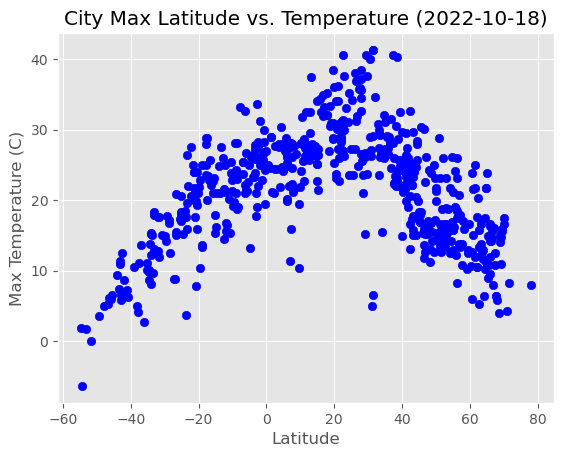

In [37]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='b')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")

# doesnt always show up right away, please save and rerun to see gglot
plt.style.use('ggplot')

# Save the figure
plt.savefig("Fig1_updated.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

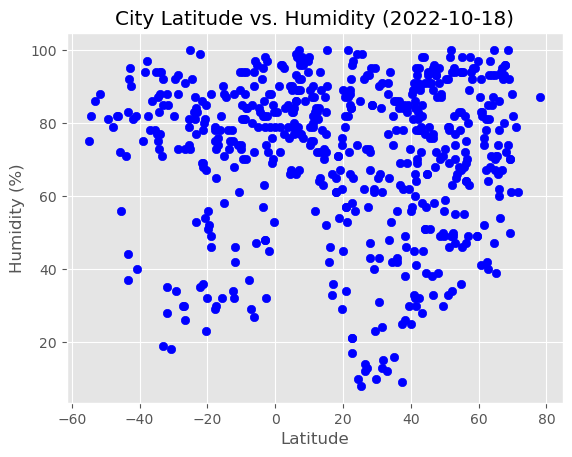

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='b')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.style.use('ggplot')

# Save the figure
plt.savefig("Fig2_updated.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

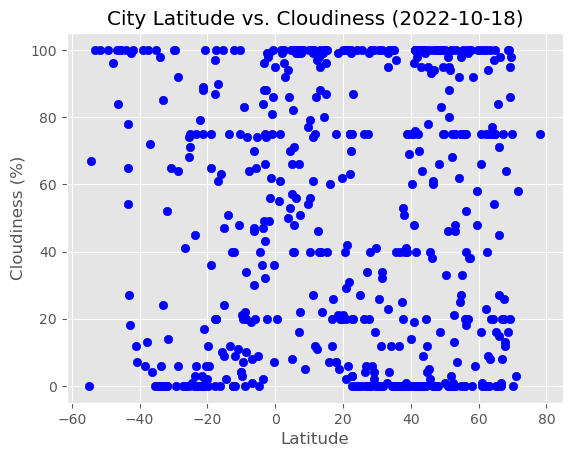

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='b')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.style.use('ggplot')

# Save the figure
plt.savefig("Fig3_updated.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

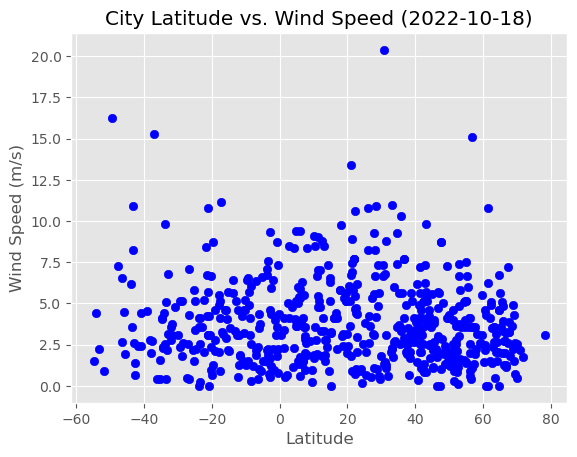

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='b')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.style.use('ggplot')

# Save the figure
plt.savefig("Fig4_updated.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


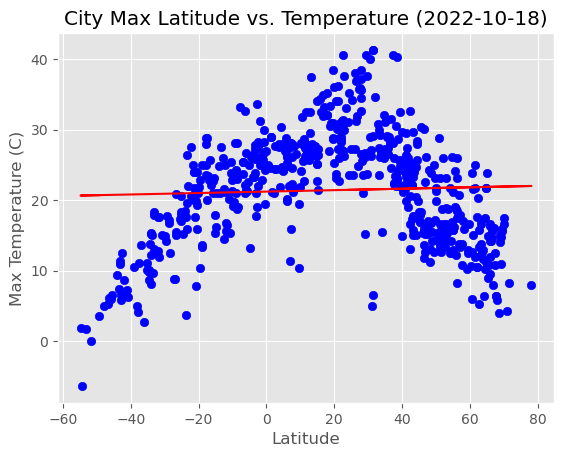

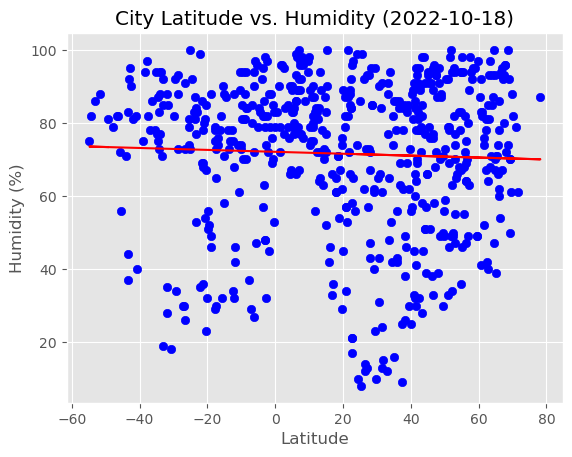

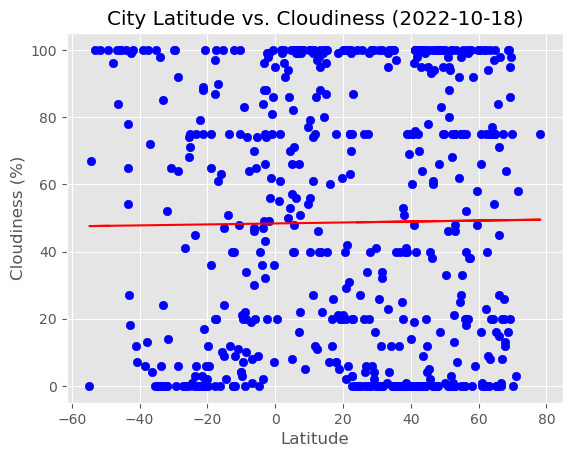

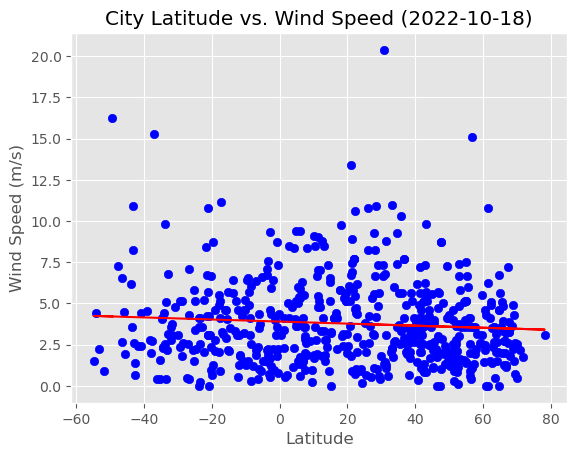

In [26]:
# Define a function to create Linear Regression plots

# do subplot? no...
# add this?
# plt.annotate(line_eq,(20,36),fontsize = 15, color = "red")

x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='b')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.show()

x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='b')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.show()

x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='b')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.show()

x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='b')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,taoudenni,22.6783,-3.9836,40.53,17,0,4.44,ML,1691444815
6,strezhevoy,60.7333,77.5889,12.70,92,66,2.48,RU,1691444816
7,bilibino,68.0546,166.4372,5.80,72,64,1.84,RU,1691444816
8,kharp,66.8014,65.8081,16.07,95,8,3.23,RU,1691444816
10,primorsk,46.7348,36.3443,22.60,58,0,4.72,UA,1691444816


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.60,81,100,16.25,TF,1691444815
1,grytviken,-54.2811,-36.5092,-6.35,82,67,4.40,GS,1691444815
2,sarmiento,-45.5882,-69.0700,6.49,56,100,1.95,AR,1691444815
3,afaahiti,-17.7500,-149.2833,27.93,79,97,5.51,PF,1691444815
5,puerto ayora,-0.7393,-90.3518,29.98,85,86,3.58,EC,1691444816


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: -0.640246471556052


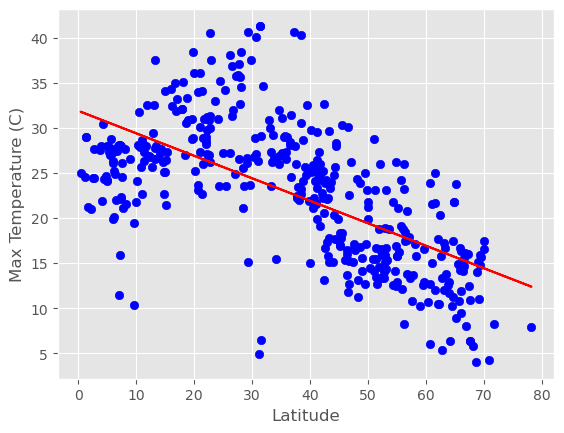

In [29]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5, 280), fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"the r-value is: {rvalue}")
plt.show()

the r-value is: 0.8262090049289226


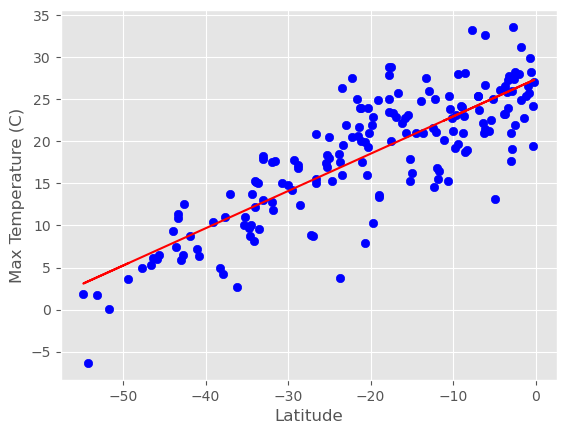

In [30]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25, 275),fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"the r-value is: {rvalue}")
plt.show()

**discussion about the linear relationship:**

inspiration from https://towardsdatascience.com/the-importance-of-r-in-data-science-6b394d48fa50#:~:text=Put%20simply%2C%20it%20is%20Pearson's%20correlation%20coefficient%20(r).,1%20and%20a%20%2B1).

given the r-values, the data points provided appear to show a large strength of association between country latitude and max temperature. it makes logical sense that as the latitutde of a country draws closer to 0, the max temperature would increase as it would be located closer to the equator. a slightly weaker correlation, although still a considerable one, would be the opposite relationship. the latter, of course, does come with some caveats though.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: -0.054243370501717285


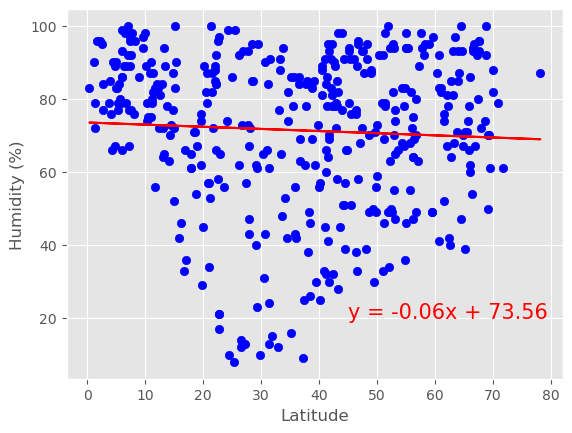

In [31]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45, 20),fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"the r-value is: {rvalue}")
plt.show()

the r-value is: -0.039464404195730184


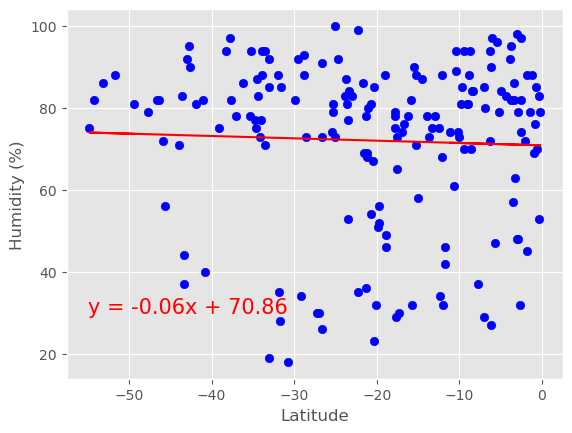

In [32]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 30),fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"the r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:**

inspiration from https://towardsdatascience.com/the-importance-of-r-in-data-science-6b394d48fa50#:~:text=Put%20simply%2C%20it%20is%20Pearson's%20correlation%20coefficient%20(r).,1%20and%20a%20%2B1).

given the r-values, the data points provided appear to show a small strength of association between country latitude and humidity. whether there is an actual relationship or not (medium to large, positive or negative), this makes logical sense as humidity is caused by a variety of factors, which may or may not be independent of country latitude.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: -0.16381823021828942


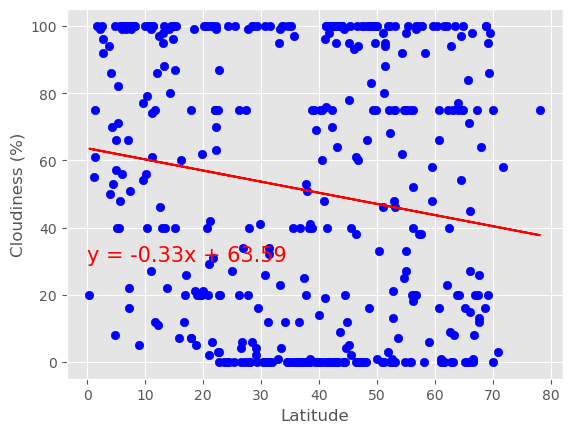

In [33]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 30),fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"the r-value is: {rvalue}")
plt.show()

the r-value is: -0.03790388242719926


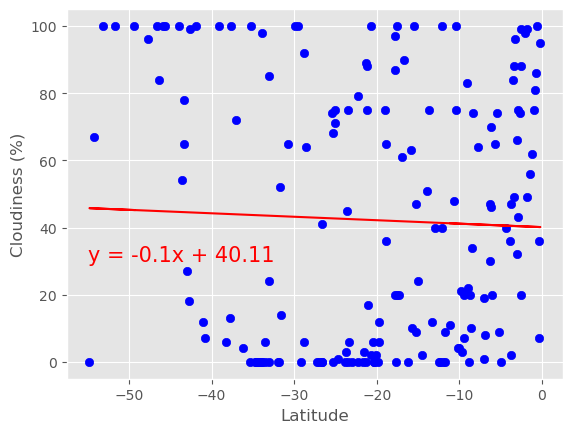

In [34]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 30),fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"the r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:**

inspiration from https://towardsdatascience.com/the-importance-of-r-in-data-science-6b394d48fa50#:~:text=Put%20simply%2C%20it%20is%20Pearson's%20correlation%20coefficient%20(r).,1%20and%20a%20%2B1).

given the r-values, the data points provided appear to show a small strength of association between country latitude and cloudiness. whether there is an actual relationship between the two variables or not (medium to large, negative or positive), this makes logical sense as cloudiness in any area of the world is dependent on various factor, which may or may not include latitude.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: -0.17169251168589136


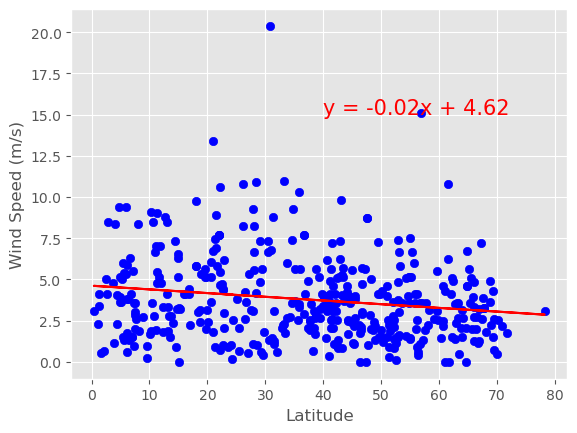

In [35]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 15),fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"the r-value is: {rvalue}")
plt.show()

the r-value is: -0.08324115923705105


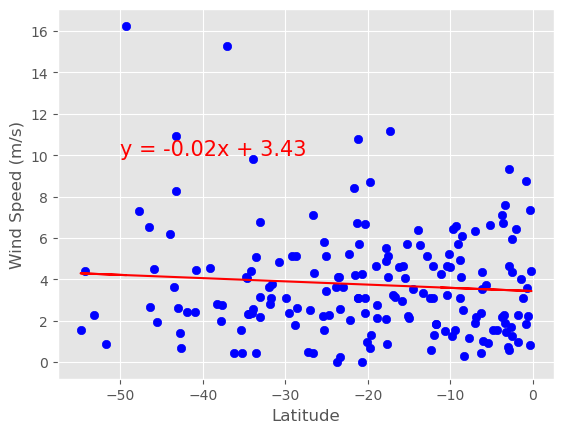

In [36]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 10),fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"the r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:**

inspiration from https://towardsdatascience.com/the-importance-of-r-in-data-science-6b394d48fa50#:~:text=Put%20simply%2C%20it%20is%20Pearson's%20correlation%20coefficient%20(r).,1%20and%20a%20%2B1).

given the r-values, the data points provided appear to show a small strength of association between country latitude and wind speed. whether or not there is a real relationship between them (medium to large, negative or positive), it makes logical sense given the circumstances as wind speeds can be affected by a plethora of factors, which may or may not include latitude. 